In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [3]:
df = pd.read_csv('Ecommerce Customers.csv')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [10]:
x.shape

(500, 4)

In [11]:
x.shape[1]

4

## Defining the model structure

In [12]:
model = Sequential()
model.add(Dense(2048, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              10240     
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               2

In [14]:
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [15]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=600)

## Training the model

In [16]:
history = model.fit(x=x_train, y=y_train, epochs=500, callbacks=[lrd, mcp], batch_size=64, validation_split=0.1)

Train on 360 samples, validate on 40 samples
Epoch 1/500
360/360 [==============================] - 1s 3ms/sample - loss: 248909.7521 - val_loss: 179555.6250
Epoch 2/500
360/360 [==============================] - 0s 358us/sample - loss: 95025.3411 - val_loss: 44827.7500
Epoch 3/500
360/360 [==============================] - 0s 378us/sample - loss: 42395.7584 - val_loss: 52289.2617
Epoch 4/500
360/360 [==============================] - 0s 364us/sample - loss: 38776.1309 - val_loss: 41165.9922
Epoch 5/500
360/360 [==============================] - 0s 369us/sample - loss: 29596.4299 - val_loss: 33124.3242
Epoch 6/500
360/360 [==============================] - 2s 5ms/sample - loss: 23490.9406 - val_loss: 22555.3008
Epoch 7/500
360/360 [==============================] - 0s 403us/sample - loss: 19916.5397 - val_loss: 20967.3867
Epoch 8/500
360/360 [==============================] - 0s 394us/sample - loss: 17239.9390 - val_loss: 15861.8340
Epoch 9/500
360/360 [==============================] 

360/360 [==============================] - 0s 364us/sample - loss: 1708.1617 - val_loss: 962.3099
Epoch 149/500
360/360 [==============================] - 0s 363us/sample - loss: 1232.4079 - val_loss: 925.6263
Epoch 150/500
360/360 [==============================] - 0s 358us/sample - loss: 1265.2557 - val_loss: 561.0549
Epoch 151/500
360/360 [==============================] - 0s 361us/sample - loss: 962.5350 - val_loss: 198.6480
Epoch 152/500
360/360 [==============================] - 0s 361us/sample - loss: 631.2478 - val_loss: 197.5141
Epoch 153/500
360/360 [==============================] - 0s 358us/sample - loss: 645.0124 - val_loss: 405.3012
Epoch 154/500
360/360 [==============================] - 0s 358us/sample - loss: 806.2325 - val_loss: 149.7602
Epoch 155/500
360/360 [==============================] - 0s 358us/sample - loss: 607.7766 - val_loss: 194.4920
Epoch 156/500
360/360 [==============================] - 0s 375us/sample - loss: 747.8044 - val_loss: 159.3655
Epoch 157/50

Epoch 222/500
360/360 [==============================] - 0s 358us/sample - loss: 853.2729 - val_loss: 747.2734
Epoch 223/500
360/360 [==============================] - 0s 358us/sample - loss: 1101.9462 - val_loss: 1852.4365
Epoch 224/500
360/360 [==============================] - 0s 358us/sample - loss: 1437.6157 - val_loss: 448.3595
Epoch 225/500
360/360 [==============================] - 0s 358us/sample - loss: 707.7717 - val_loss: 365.5563
Epoch 226/500
360/360 [==============================] - 0s 358us/sample - loss: 742.4380 - val_loss: 198.3178
Epoch 227/500
360/360 [==============================] - 0s 364us/sample - loss: 700.8872 - val_loss: 207.0382
Epoch 228/500
360/360 [==============================] - 0s 392us/sample - loss: 611.2343 - val_loss: 528.1559
Epoch 229/500
360/360 [==============================] - 0s 367us/sample - loss: 666.4642 - val_loss: 132.7942
Epoch 230/500
360/360 [==============================] - 0s 745us/sample - loss: 710.8134 - val_loss: 150.923

Epoch 368/500
360/360 [==============================] - 0s 361us/sample - loss: 782.8821 - val_loss: 247.4522
Epoch 369/500
360/360 [==============================] - 0s 378us/sample - loss: 723.7838 - val_loss: 158.9236
Epoch 370/500
360/360 [==============================] - 0s 383us/sample - loss: 726.2919 - val_loss: 584.3392
Epoch 371/500
360/360 [==============================] - 0s 372us/sample - loss: 969.0209 - val_loss: 232.0008
Epoch 372/500
360/360 [==============================] - 0s 375us/sample - loss: 692.4637 - val_loss: 260.0965
Epoch 373/500
360/360 [==============================] - 0s 372us/sample - loss: 840.6751 - val_loss: 342.2170
Epoch 374/500
360/360 [==============================] - 0s 358us/sample - loss: 938.8752 - val_loss: 512.2950
Epoch 375/500
360/360 [==============================] - 0s 361us/sample - loss: 943.1838 - val_loss: 832.6166
Epoch 376/500
360/360 [==============================] - 0s 361us/sample - loss: 876.1342 - val_loss: 138.7978
E

Epoch 442/500
360/360 [==============================] - 0s 372us/sample - loss: 554.1118 - val_loss: 128.7026
Epoch 443/500
360/360 [==============================] - 0s 375us/sample - loss: 564.3133 - val_loss: 141.6938
Epoch 444/500
360/360 [==============================] - 0s 367us/sample - loss: 483.5934 - val_loss: 313.9657
Epoch 445/500
360/360 [==============================] - 0s 536us/sample - loss: 723.5644 - val_loss: 307.3365
Epoch 446/500
360/360 [==============================] - 0s 378us/sample - loss: 671.6994 - val_loss: 294.6419
Epoch 447/500
360/360 [==============================] - 0s 370us/sample - loss: 637.5369 - val_loss: 199.1500
Epoch 448/500
360/360 [==============================] - 0s 364us/sample - loss: 506.3197 - val_loss: 229.0992
Epoch 449/500
360/360 [==============================] - 0s 394us/sample - loss: 557.5989 - val_loss: 163.5242
Epoch 450/500
360/360 [==============================] - 0s 381us/sample - loss: 548.4856 - val_loss: 215.1434
E

## Testing & evaluating the model

In [17]:
y_pred = model.predict(x_test)
y_pred

array([[399.032  ],
       [537.7035 ],
       [420.3618 ],
       [500.55722],
       [399.49942],
       [570.7509 ],
       [530.07654],
       [502.85114],
       [399.78717],
       [466.373  ],
       [427.22644],
       [422.23215],
       [421.2655 ],
       [512.95245],
       [425.03113],
       [412.54654],
       [580.9012 ],
       [479.07724],
       [455.5476 ],
       [478.67792],
       [498.167  ],
       [505.73218],
       [505.5702 ],
       [647.06177],
       [441.98007],
       [489.58405],
       [546.4386 ],
       [546.94037],
       [386.81662],
       [315.22925],
       [523.91266],
       [473.64316],
       [497.13876],
       [301.17575],
       [503.99197],
       [475.25195],
       [516.77246],
       [429.65317],
       [450.75378],
       [466.09863],
       [484.77295],
       [456.18985],
       [502.4903 ],
       [493.87747],
       [494.01367],
       [526.5541 ],
       [615.116  ],
       [508.84442],
       [294.0924 ],
       [425.704  ],


In [18]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
347    593.156401
86     487.379306
75     478.719357
438    392.992256
15     461.780742
Name: Yearly Amount Spent, Length: 100, dtype: float64

In [19]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9664980629752329

In [20]:
model.predict(x_test)[50]

array([410.4007], dtype=float32)

In [21]:
y_test.iloc[50]

418.1500810968496

In [22]:
model.predict(x_test)[70]

array([522.0509], dtype=float32)

In [23]:
y_test.iloc[70]

532.1274491097012

In [5]:
model.predict(sc.transform([[34, 12, 39, 4]]))

array([[557.60254]], dtype=float32)

## Visualize Loss

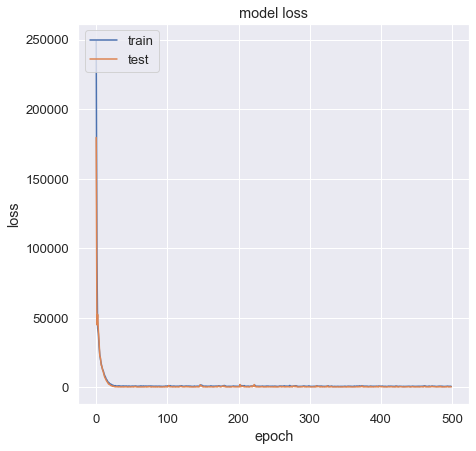

In [25]:
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [26]:
model.save('model.h5')

In [2]:
import joblib

In [10]:
joblib.dump(sc, 'scaler.pkl')

## Loding Model

In [3]:
sc = joblib.load('scaler.pkl')

In [4]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
model.predict(sc.transform([[34, 12, 39, 4]]))

array([[557.60254]], dtype=float32)

# Great Work!